In [1]:
clear
close all


Ocean data import


In [2]:
Ocean_data = readtable('HAWI.csv', 'VariableNamingRule', 'preserve');
save('HAWI.mat', 'Ocean_data');
load('HAWI.mat');


Atmospheric data (CO₂) import


In [3]:
CO2_data = readtable('monthly_flask_co2_mlo.csv', 'VariableNamingRule', 'preserve');
save('monthly_flask_co2.mat', 'CO2_data');
load('monthly_flask_co2.mat');


Atmospheric data (C13) import


In [4]:
C13_data = readtable('monthly_flask_c13_mlo.csv', 'VariableNamingRule', 'preserve');
save('monthly_flask_c13.mat', 'C13_data');
load('monthly_flask_c13.mat');


**Anthoropogenic CO₂ and Isotopic Trends (Atmospheric Data)**


Plot time\-series trend of anthropogenic CO₂ concentration at Mauna Loa Mauna Loa Observatory, Hawaii.


"The keeling curve" shows the long\-term trend of rising CO₂ level.



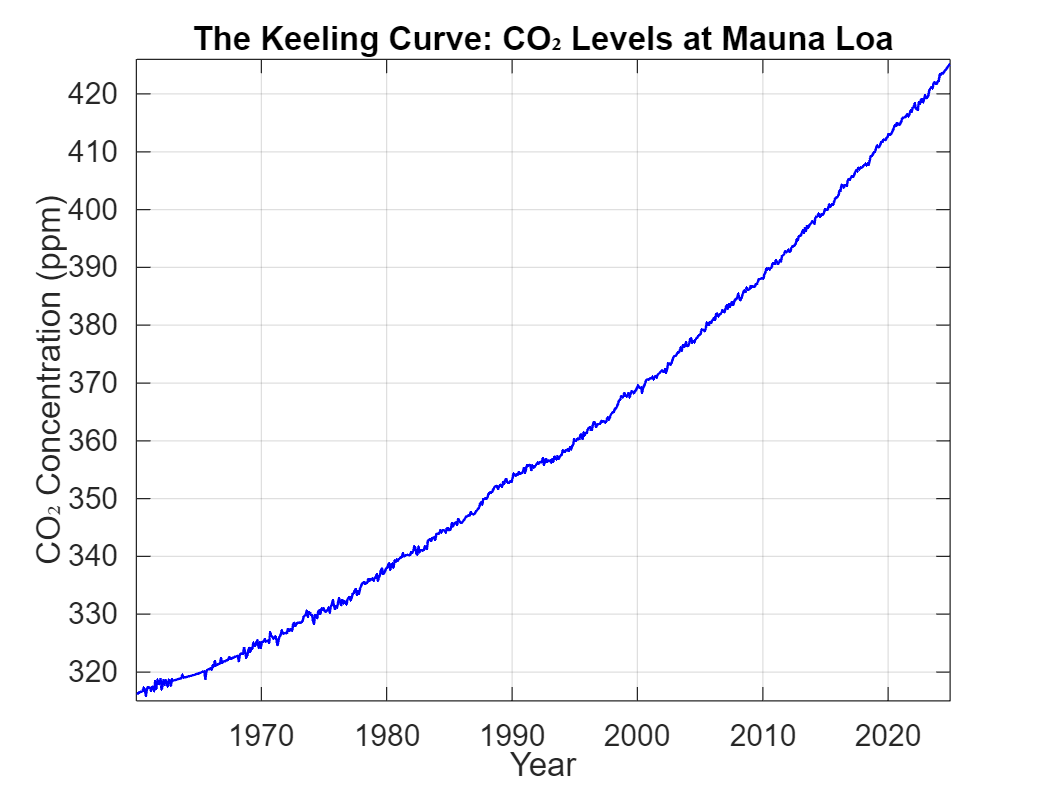

In [5]:
if exist('CO2_data', 'var')
    decimal_dates_CO2 = CO2_data.decimal_dateCO2;
    season_adj_filled_CO2 = CO2_data{:, end};

    % Plot the Keeling Curve
    figure(1);
    clf
    plot(decimal_dates_CO2, season_adj_filled_CO2, 'b-', 'LineWidth', 1);
    title('The Keeling Curve: CO₂ Levels at Mauna Loa');
    xlabel('Year');
    ylabel('CO₂ Concentration (ppm)');
    grid on;
    xlim([min(decimal_dates_CO2), max(decimal_dates_CO2)]);
    ylim([floor(min(season_adj_filled_CO2)), ceil(max(season_adj_filled_CO2))]);
    set(gca, 'FontSize', 12);
end


The keeling curve was named after Charles David Keeling, it is a widely known iconic graph that depicts the long\-term trend for atmospheric CO₂ concentrations at Mauna Loa, Hawaii. The curve shows an upward trend in CO₂ concentrations, starting from around 315 ppm to over 420 ppm from 1960 to the present. This reflects the increase of human activities, such as burning of fossil fuels, deforestation, and other industrial processes, which release large amounts of CO₂ into the atmosphere.


Plot time\-series trend of atmospheric δ13C\-CO₂ concentrations from 1980 to the present.



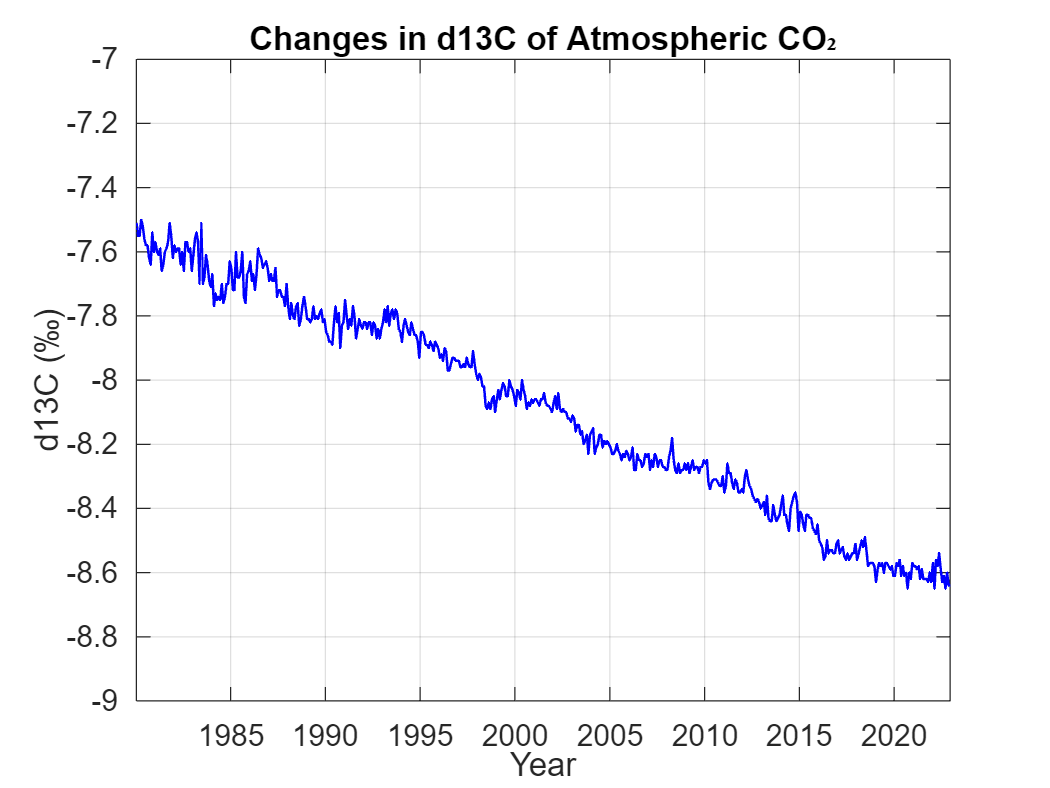

In [6]:
if exist('C13_data', 'var')
    decimal_dates_C13 = C13_data.decimal_dateC13;
    season_adj_filled_C13 = C13_data{:, end};

    figure(2);
    clf
    plot(decimal_dates_C13, season_adj_filled_C13, 'b-', 'LineWidth', 1);
    title('Changes in d13C-CO₂');
    xlabel('Year');
    ylabel('d13C (‰)');
    grid on;
    xlim([min(decimal_dates_C13), max(decimal_dates_C13)]);
    ylim([floor(min(season_adj_filled_C13)), ceil(max(season_adj_filled_C13))]);
    set(gca, 'FontSize', 12);
end


This time\-series plot illustrates the long\-term decline in δ¹³C\-CO₂ over the past 40 years. As fossil fuel\-derived CO₂ accumulates in the atmosphere, it lowers the overall δ¹³C\-CO₂ values. This steady decline serves as a clear isotopic signature of rising anthropogenic CO₂ emissions.


Plot the time\-series of total DIC at the station "HAWI" from 1988 to 2016.



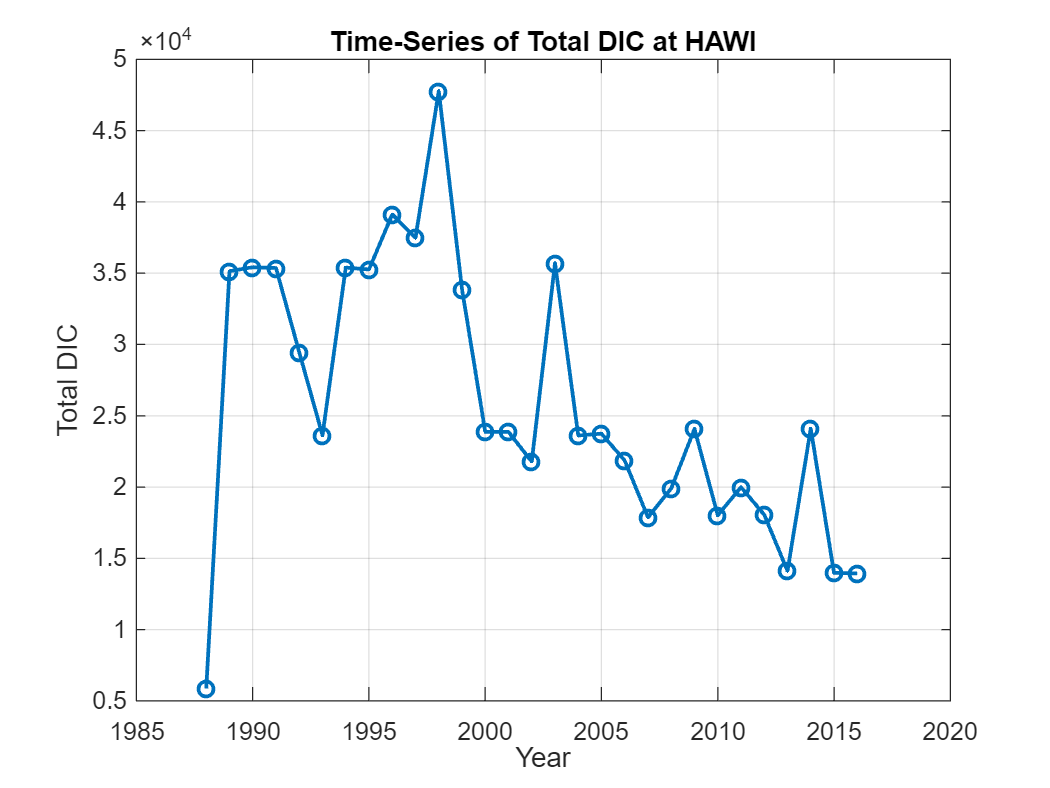

In [7]:
dates = Ocean_data.Date;
DIC = Ocean_data.DIC;

% Extract the year from the dates
years = year(dates);

% Group by year and calculate the total DIC for each year
unique_years = unique(years);
total_DIC_by_year = arrayfun(@(yr) sum(DIC(years == yr), 'omitnan'), unique_years);

figure(3);
plot(unique_years, total_DIC_by_year, '-o', 'LineWidth', 1.5);
xlabel('Year');
ylabel('Total DIC');
title('Time-Series of Total DIC at HAWI');
grid on;


In Figure 3, total DIC shows significant variability over the years, with an overall increase during the late 1980s and early 1990s, reaching a peak in 1998. After this peak, a gradual decline is observed, along with some fluctuations, until 2016.


Plot the time\-series of total d13C\-DIC at the station "HAWI" from 1988 to 2016.



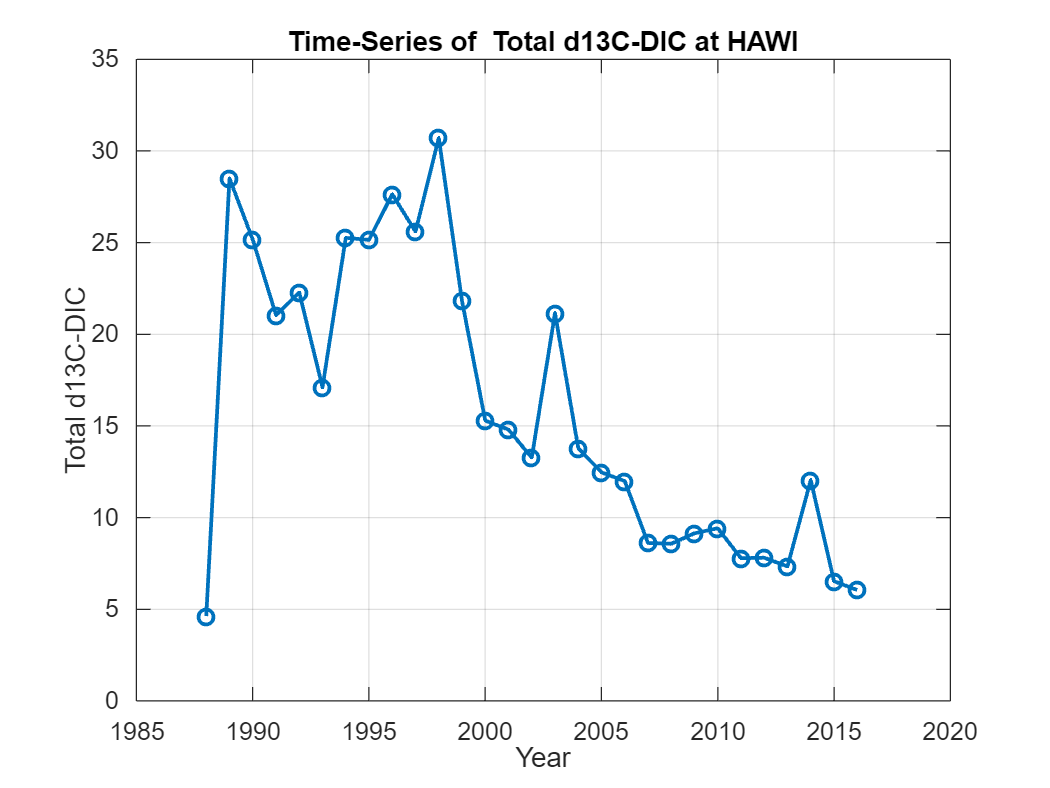

In [8]:
dates = Ocean_data.Date;
d13C_DIC = Ocean_data.d13C_DIC;

% Extract the year
years = year(dates);

% Group by year and calculate the total d13C-DIC for each year
unique_years = unique(years);
total_d13C_DIC_by_year = arrayfun(@(yr) sum(d13C_DIC(years == yr), 'omitnan'), unique_years);

figure(4);
clf
plot(unique_years, total_d13C_DIC_by_year, '-o', 'LineWidth', 1.5);
xlabel('Year');
ylabel('Total d13C-DIC');
title('Time-Series of  Total d13C-DIC at HAWI');
grid on;


In Figure 4, the total d13C\-DIC follows a similar pattern of variability but exhibits a sharper decline after its peak in 1998.  When CO₂ from fossil fuels is absorbed by the ocean, it lowers the d13C\-DIC concentration in seawater. The decreasing trend in d13C\-DIC highlights the increasing contribution of isotopically lighter carbon, likely from fossil fuel\-derived CO₂, into the ocean.


 **Correlation analyses** between atmospheric and oceanic carbon chemistry metrics were examined: CO₂ vs DIC, δ¹³C\-CO₂ vs δ¹³C\-DIC, and CO₂ vs δ¹³C\-CO₂.


The correlation coefficient (R) was calculated and represented as a linear trendline to measure the strength of these relationships. R > 0.7 indicates strong positive correlation; 0.3 < R < 0.7 indicates moderate correlation, and R < 0.3 indicates week or no correlation.


**CO₂ vs DIC**



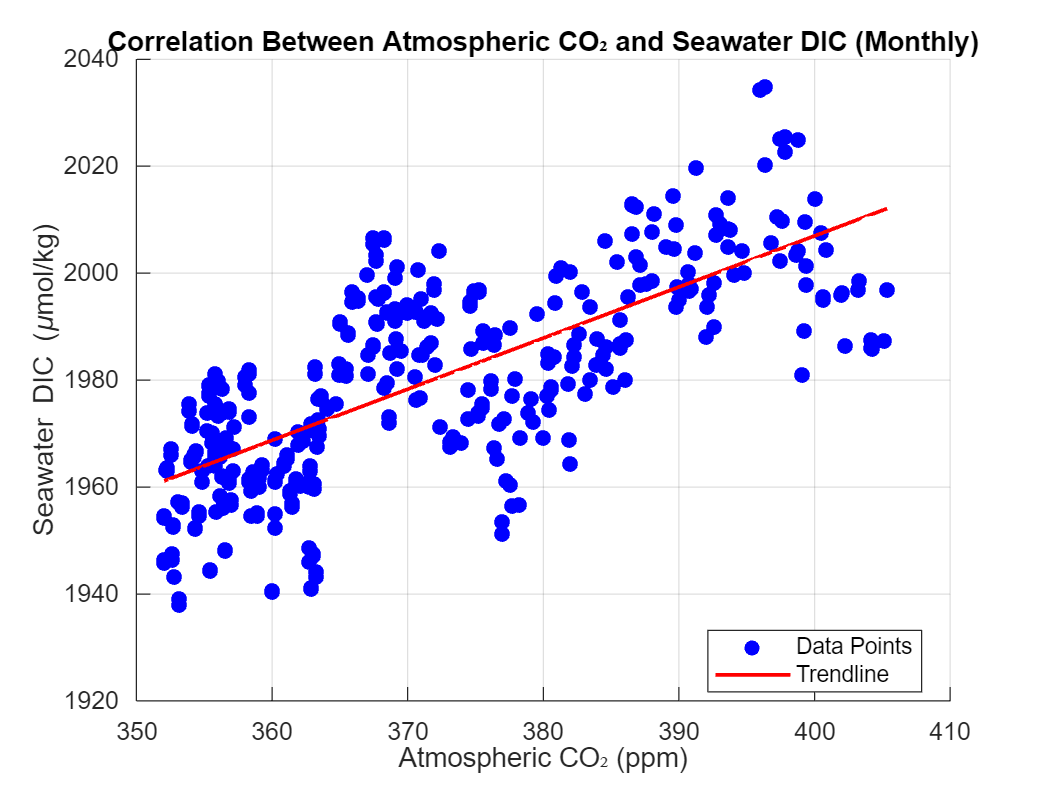

Correlation coefficient (R): 0.73

In [9]:
if exist('CO2_data', 'var') && exist('Ocean_data', 'var')
    % Extract year and month for CO2
    CO2_year = CO2_data.Yr_CO2;
    CO2_month = CO2_data.Mn_CO2;
    season_adj_filled_CO2 = CO2_data{:, end};

    % Remove NaN values from CO2 data
    valid_CO2_indices = ~isnan(season_adj_filled_CO2);
    CO2_year = CO2_year(valid_CO2_indices);
    CO2_month = CO2_month(valid_CO2_indices);
    season_adj_filled_CO2 = season_adj_filled_CO2(valid_CO2_indices);

    % Convert ocean date to datetime format and extract year and month
    ocean_dates = datetime(Ocean_data.Date, 'InputFormat', 'yyyy-MM-dd');
    ocean_year = year(ocean_dates);
    ocean_month = month(ocean_dates);
    seawater_DIC = Ocean_data.DIC;

    % Remove NaN values from Ocean data
    valid_DIC_indices = ~isnan(seawater_DIC);
    ocean_year = ocean_year(valid_DIC_indices);
    ocean_month = ocean_month(valid_DIC_indices);
    seawater_DIC = seawater_DIC(valid_DIC_indices);

    % Match both Data by Year and Month
    matched_CO2 = [];
    matched_DIC = [];
    for i = 1:length(ocean_year)
        match_idx = find(CO2_year == ocean_year(i) & CO2_month == ocean_month(i), 1);
        if ~isempty(match_idx)
            matched_CO2 = [matched_CO2; season_adj_filled_CO2(match_idx)];
            matched_DIC = [matched_DIC; seawater_DIC(i)];
        end
    end

    % Remove NaN values from matched data
    valid_indices = ~isnan(matched_CO2) & ~isnan(matched_DIC);
    matched_CO2 = matched_CO2(valid_indices);
    matched_DIC = matched_DIC(valid_indices);

    figure(5);
    scatter(matched_CO2, matched_DIC, 40, 'filled', 'MarkerFaceColor', 'b', 'DisplayName', 'Data Points');
    hold on;
    coefficients = polyfit(matched_CO2, matched_DIC, 1); % Linear regression
    trendline = polyval(coefficients, matched_CO2);
    plot(matched_CO2, trendline, 'r-', 'LineWidth', 1.5, 'DisplayName', 'Trendline');
    hold off;
    title('Correlation Between Atmospheric CO₂ and Seawater DIC (Monthly)');
    xlabel('Atmospheric CO₂ (ppm)');
    ylabel('Seawater DIC (\mumol/kg)');
    legend('Location', 'best');
    grid on;

    % Correlation Coefficient
    correlation_coefficient = corr(matched_CO2, matched_DIC);
    fprintf('Correlation coefficient (R): %.2f\n', correlation_coefficient);
end


Figure 5 shows a correlation coefficient (R) of 0.73, indicating a strong positive relationship between atmospheric CO₂ and seawater DIC. As atmospheric CO₂ concentrations rise, more CO₂ dissolves into the ocean at the air\-sea interface. This dissolved CO₂ reacts with water to form carbonic acid (H₂CO₃), which subsequently dissociates into bicarbonate (HCO₃⁻) and carbonate (CO₃²⁻) ions—the primary components of DIC. This process explains the observed increase in DIC alongside rising atmospheric CO₂. The ocean acts as a carbon sink, absorbing anthropogenic CO₂ and temporarily mitigating its buildup in the atmosphere. However, this uptake also contributes to ocean acidification, gradually altering seawater chemistry.


**δ¹³C\-CO₂ vs δ¹³C\-DIC**



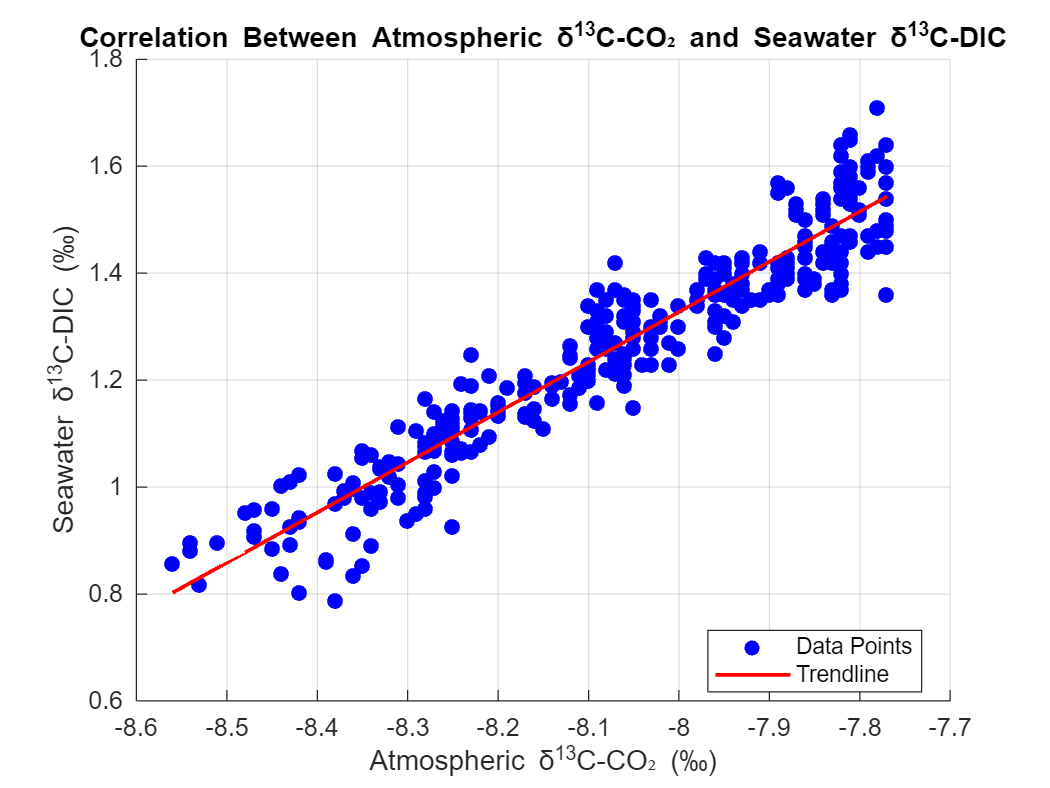

Correlation coefficient (R): 0.95

In [10]:
if exist('C13_data', 'var') && exist('Ocean_data', 'var')
    % Extract atmospheric δ13C-CO2 and decimal dates
    CO2_decimal_dates = C13_data.decimal_dateC13;
    d13C_CO2 = C13_data{:, end};  % seasonally adjusted δ13C-CO2

    % Remove NaNs
    valid_CO2_idx = ~isnan(d13C_CO2);
    CO2_decimal_dates = CO2_decimal_dates(valid_CO2_idx);
    d13C_CO2 = d13C_CO2(valid_CO2_idx);

    % Extract seawater δ13C-DIC and convert date to decimal year
    ocean_dates = datetime(Ocean_data.Date, 'InputFormat', 'yyyy-MM-dd');
    ocean_decimal_dates = year(ocean_dates) + (month(ocean_dates) - 1) / 12;
    d13C_DIC = Ocean_data.d13C_DIC;

    % Remove NaNs
    valid_ocean_idx = ~isnan(d13C_DIC);
    ocean_decimal_dates = ocean_decimal_dates(valid_ocean_idx);
    d13C_DIC = d13C_DIC(valid_ocean_idx);

    % Match by month (within ±1/24 of a year ~15 days)
    matched_d13C_CO2 = [];
    matched_d13C_DIC = [];
    for i = 1:length(ocean_decimal_dates)
        idx = find(abs(CO2_decimal_dates - ocean_decimal_dates(i)) < 1/24, 1);
        if ~isempty(idx)
            matched_d13C_CO2 = [matched_d13C_CO2; d13C_CO2(idx)];
            matched_d13C_DIC = [matched_d13C_DIC; d13C_DIC(i)];
        end
    end

    % Clean up any leftover NaNs
    valid_idx = ~isnan(matched_d13C_CO2) & ~isnan(matched_d13C_DIC);
    matched_d13C_CO2 = matched_d13C_CO2(valid_idx);
    matched_d13C_DIC = matched_d13C_DIC(valid_idx);

    % Plot the relationship
    figure(6);
    scatter(matched_d13C_CO2, matched_d13C_DIC, 40, 'filled', 'MarkerFaceColor', 'b', 'DisplayName', 'Data Points');
    hold on;
    coeffs = polyfit(matched_d13C_CO2, matched_d13C_DIC, 1);
    fit_line = polyval(coeffs, matched_d13C_CO2);
    plot(matched_d13C_CO2, fit_line, 'r-', 'LineWidth', 1.5, 'DisplayName', 'Trendline');
    hold off;

    title('Correlation Between Atmospheric δ^{13}C-CO₂ and Seawater δ^{13}C-DIC');
    xlabel('Atmospheric δ^{13}C-CO₂ (‰)');
    ylabel('Seawater δ^{13}C-DIC (‰)');
    legend('Location', 'best');
    grid on;

    % Correlation coefficient
    R = corr(matched_d13C_CO2, matched_d13C_DIC);
    fprintf('Correlation coefficient (R): %.2f\n', R);
end


Figure 6 demonstrates a strong positive correlation (R = 0.95) between atmospheric δ¹³C\-CO₂ and seawater δ¹³C\-DIC, highlighting how isotopic changes in the atmosphere are mirrored in the ocean. This relationship reflects the isotopic fingerprint of anthropogenic carbon emissions. Fossil fuels are depleted in ¹³C (containing more ¹²C), so burning them lowers atmospheric δ¹³C\-CO₂—a phenomenon known as the Suess Effect. As the ocean absorbs this isotopically lighter CO₂, it causes a corresponding decline in δ¹³C\-DIC. Because both variables are δ¹³C values, their comparison is isotopically meaningful and provides a powerful tracer of fossil fuel\-derived carbon and air\-sea carbon exchange. This strong alignment highlights the ocean’s responsiveness in absorbing fossil fuel\-derived CO₂ and mirroring atmospheric isotopic trends.


**CO₂ vs δ¹³C\-CO₂**



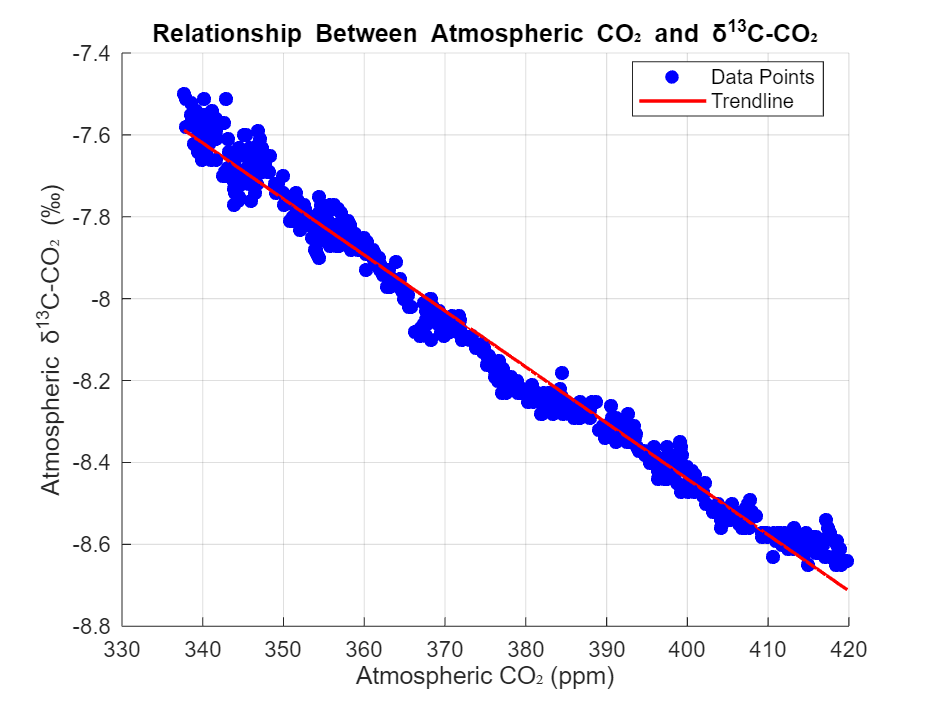

Correlation coefficient (R): -0.99

In [11]:
if exist('CO2_data', 'var') && exist('C13_data', 'var')
    % Extract year and month for CO2 and d13C-CO2
    CO2_year = CO2_data.Yr_CO2;
    CO2_month = CO2_data.Mn_CO2;
    season_adj_filled_CO2 = CO2_data{:, end};  % atmospheric CO2 (ppm)

    C13_year = C13_data.Yr_C13;
    C13_month = C13_data.Mn_C13;
    season_adj_filled_C13 = C13_data{:, end};  % atmospheric δ13C-CO2 (‰)

    % Remove NaNs from CO2 data
    valid_CO2_idx = ~isnan(season_adj_filled_CO2);
    CO2_year = CO2_year(valid_CO2_idx);
    CO2_month = CO2_month(valid_CO2_idx);
    season_adj_filled_CO2 = season_adj_filled_CO2(valid_CO2_idx);

    % Remove NaNs from d13C-CO2 data
    valid_C13_idx = ~isnan(season_adj_filled_C13);
    C13_year = C13_year(valid_C13_idx);
    C13_month = C13_month(valid_C13_idx);
    season_adj_filled_C13 = season_adj_filled_C13(valid_C13_idx);

    % Match by year and month
    matched_CO2 = [];
    matched_C13 = [];
    for i = 1:length(C13_year)
        idx = find(CO2_year == C13_year(i) & CO2_month == C13_month(i), 1);
        if ~isempty(idx)
            matched_CO2 = [matched_CO2; season_adj_filled_CO2(idx)];
            matched_C13 = [matched_C13; season_adj_filled_C13(i)];
        end
    end

    % Remove any remaining NaNs
    valid_idx = ~isnan(matched_CO2) & ~isnan(matched_C13);
    matched_CO2 = matched_CO2(valid_idx);
    matched_C13 = matched_C13(valid_idx);

    % Plot CO2 vs δ13C-CO2
    figure(7);
    scatter(matched_CO2, matched_C13, 40, 'filled', 'MarkerFaceColor', 'b', 'DisplayName', 'Data Points');
    hold on;
    coeffs = polyfit(matched_CO2, matched_C13, 1);
    fit_line = polyval(coeffs, matched_CO2);
    plot(matched_CO2, fit_line, 'r-', 'LineWidth', 1.5, 'DisplayName', 'Trendline');
    hold off;

    % Labeling
    title('Relationship Between Atmospheric CO₂ and δ^{13}C-CO₂');
    xlabel('Atmospheric CO₂ (ppm)');
    ylabel('Atmospheric δ^{13}C-CO₂ (‰)');
    legend('Location', 'best');
    grid on;

    % Correlation coefficient
    R = corr(matched_CO2, matched_C13);
    fprintf('Correlation coefficient (R): %.2f\n', R);
end


This scatterplot demonstrates a strong negative correlation (R = –0.99) between atmospheric CO₂ concentration (ppm) and δ¹³C\-CO₂ (‰). This reflects the Suess Effect—as CO₂ increases, δ¹³C\-CO₂ declines due to the rising contribution of fossil fuel emissions, which are isotopically lighter (low ¹³C/¹²C ratio). Fossil fuels—derived from ancient organic matter—are depleted in ¹³C. When burned, they release CO₂ enriched in ¹²C, lowering the δ¹³C of atmospheric CO₂.


This is not a generic chemical trend but a distinct isotopic fingerprint of anthropogenic emissions. Natural sources like volcanoes or respiration do not significantly alter δ¹³C\-CO₂. This near\-perfect inverse relationship confirms that the increase in atmospheric CO₂ is primarily fossil\-derived, providing strong evidence of human impact on the carbon cycle.

